<a href="https://colab.research.google.com/github/Shaikmd3797/ITEM-DEMAND-FORECASTING-/blob/main/ITEM_DEMAND_FORECASTING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***ITEM DEMAND FORCASTING FOR 3 MONTHS.***

 # ***AIM:***
     
*  # *This model was analysing the 5 years of sales of 50+ items in 10+ different shops at every day .It will be find the demand of next three months of items .*


1.  *data cleaning.*
2.  *EDA for dataset.*
3.  *splitting of data*
4.  *scaling of the data*
5.  *build the model* 

 *   linear regression algorithm
 *   KNN regressor algorithm
 *   Decision tree regressor algorithm
 *   Random forest regressor algorithm
 *   Xgboost algorithm
 *   voting regressor algorithm

6.  *evaluate the all models*

 








# **1. Data Cleaning**

In [28]:
# import all neccessary libraries for data reading, cleaning and EDA
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('train 2.csv')               # read the dataset
print('Shape of Raw dataset :', df.shape)   # shape of dataframe before dropping duplicates

Shape of Raw dataset : (913000, 4)


In [30]:
df=df.drop_duplicates()
print('Shape of  Dataframe after remove duplicates :',df.shape)

Shape of  Dataframe after remove duplicates : (913000, 4)


**NO Duplicates are presents in the dataset**

In [31]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [32]:
df.info()                              # check the datatypes are in right format

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 34.8+ MB


 **Datatype of date column is not meaningful.So it will change into "datetime" datatype.**

In [33]:
df['date']=pd.to_datetime(df['date']) # change the datatype of date column
df=df.sort_values(by=['date','item']) # dataset is changing into ascending order with respect to date
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1826,2013-01-01,2,1,12
3652,2013-01-01,3,1,19
5478,2013-01-01,4,1,10
7304,2013-01-01,5,1,11


In [34]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [35]:
#df=df.drop('store',axis=1)

In [36]:
df=pd.DataFrame(df.groupby(['date','item'])['sales'].sum())
df.reset_index(inplace=True)
df

,date,item,sales
0,2013-01-01,1,133
1,2013-01-01,2,327
2,2013-01-01,3,172
3,2013-01-01,4,102
4,2013-01-01,5,83
...,...,...,...
91295,2017-12-31,46,605
91296,2017-12-31,47,211
91297,2017-12-31,48,494
91298,2017-12-31,49,285


In [37]:
df['end_date']=df['date']+pd.DateOffset(months=+3)

In [38]:
df['duration']=(df['end_date']-df['date']).dt.days
df

,date,item,sales,end_date,duration
0,2013-01-01,1,133,2013-04-01,90
1,2013-01-01,2,327,2013-04-01,90
2,2013-01-01,3,172,2013-04-01,90
3,2013-01-01,4,102,2013-04-01,90
4,2013-01-01,5,83,2013-04-01,90
...,...,...,...,...,...
91295,2017-12-31,46,605,2018-03-31,90
91296,2017-12-31,47,211,2018-03-31,90
91297,2017-12-31,48,494,2018-03-31,90
91298,2017-12-31,49,285,2018-03-31,90


In [39]:
items_df=[]                                     # A whole dataframe split into multiple dataframe with respect to items
for i in range(1,51):
  items_df.append(df.loc[df['item']==i])
items_df[1]                                     # Every item have unique dataframe
  

,date,item,sales,end_date,duration
1,2013-01-01,2,327,2013-04-01,90
51,2013-01-02,2,279,2013-04-02,90
101,2013-01-03,2,304,2013-04-03,90
151,2013-01-04,2,359,2013-04-04,90
201,2013-01-05,2,377,2013-04-05,90
...,...,...,...,...,...
91051,2017-12-27,2,500,2018-03-27,90
91101,2017-12-28,2,495,2018-03-28,90
91151,2017-12-29,2,515,2018-03-29,90
91201,2017-12-30,2,538,2018-03-30,90


In [40]:
items_df[5].head()

,date,item,sales,end_date,duration
5,2013-01-01,6,288,2013-04-01,90
55,2013-01-02,6,310,2013-04-02,90
105,2013-01-03,6,309,2013-04-03,90
155,2013-01-04,6,343,2013-04-04,90
205,2013-01-05,6,343,2013-04-05,90


In [41]:
def three_month_sales(data):
  three=[]
  for i in range(0,len(data)):
    sum=data['sales'][i:i+data.iloc[i,4]].sum()
    three.append(sum)

  data['three_month_sale']=three
  data.drop(data.tail(91).index,inplace=True)
  return data

In [42]:
dataset=[three_month_sales(items_df[k]) for k in range(50)]

In [43]:
dataset[0]

,date,item,sales,end_date,duration,three_month_sale
0,2013-01-01,1,133,2013-04-01,90,12847
50,2013-01-02,1,99,2013-04-02,90,12848
100,2013-01-03,1,127,2013-04-03,90,12936
150,2013-01-04,1,145,2013-04-04,90,13019
200,2013-01-05,1,149,2013-04-05,90,13103
...,...,...,...,...,...,...
86500,2017-09-27,1,249,2017-12-27,91,21126
86550,2017-09-28,1,235,2017-12-28,91,21031
86600,2017-09-29,1,270,2017-12-29,91,20974
86650,2017-09-30,1,269,2017-12-30,91,20911


In [44]:
def delete(df,unwanted):                          # delete the unwanted columns         
  df.drop(unwanted,axis=1,inplace=True)
  return df
unwanted_col=['end_date','sales']                    
dataset=[delete(dataset[i],unwanted_col) for i in range(50)]             # One day sales ware converted into three month sales both of them gives same informations.
dataset[49]

,date,item,duration,three_month_sale
49,2013-01-01,50,90,38720
99,2013-01-02,50,90,38874
149,2013-01-03,50,90,39034
199,2013-01-04,50,90,39200
249,2013-01-05,50,90,39378
...,...,...,...,...
86549,2017-09-27,50,91,63158
86599,2017-09-28,50,91,62942
86649,2017-09-29,50,91,62787
86699,2017-09-30,50,91,62558


In [45]:
def dataframe(data):
  df=data[0]
  for i in range(1,50):
    df=df.append(data[i],ignore_index=True)
  return df

In [46]:
df=dataframe(dataset)
df

,date,item,duration,three_month_sale
0,2013-01-01,1,90,12847
1,2013-01-02,1,90,12848
2,2013-01-03,1,90,12936
3,2013-01-04,1,90,13019
4,2013-01-05,1,90,13103
...,...,...,...,...
86745,2017-09-27,50,91,63158
86746,2017-09-28,50,91,62942
86747,2017-09-29,50,91,62787
86748,2017-09-30,50,91,62558


In [47]:
def isweekend(data):
  if data < 5 :
    return 0
  else:
    return 1

In [48]:
df['day']=df['date'].dt.day
df['dayofyear']=df['date'].dt.dayofyear
df['week']=df['date'].dt.weekofyear
df['weekday']=df['date'].dt.weekday
df['weekend']=[isweekend(i) for i in df['weekday']]
df['month']=df['date'].dt.month
df['quarter']=df['date'].dt.quarter
df['year']=df['date'].dt.year
df['days_count']=df['date'].dt.days_in_month
df['month_start']=df['date'].dt.is_month_start.astype(int)
df['month_end']=df['date'].dt.is_month_end.astype(int)
df['year_start']=df['date'].dt.is_year_start.astype(int)
df['year_end']=df['date'].dt.is_year_end.astype(int)
df['quarter_start']=df['date'].dt.is_quarter_start.astype(int)
df['quarter_end']=df['date'].dt.is_quarter_end.astype(int)

In [49]:
df['month_start']=df['date'].dt.is_month_start.astype(int)

In [50]:
df

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year,days_count,month_start,month_end,year_start,year_end,quarter_start,quarter_end
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
1,2013-01-02,1,90,12848,2,2,1,2,0,1,1,2013,31,0,0,0,0,0,0
2,2013-01-03,1,90,12936,3,3,1,3,0,1,1,2013,31,0,0,0,0,0,0
3,2013-01-04,1,90,13019,4,4,1,4,0,1,1,2013,31,0,0,0,0,0,0
4,2013-01-05,1,90,13103,5,5,1,5,1,1,1,2013,31,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86745,2017-09-27,50,91,63158,27,270,39,2,0,9,3,2017,30,0,0,0,0,0,0
86746,2017-09-28,50,91,62942,28,271,39,3,0,9,3,2017,30,0,0,0,0,0,0
86747,2017-09-29,50,91,62787,29,272,39,4,0,9,3,2017,30,0,0,0,0,0,0
86748,2017-09-30,50,91,62558,30,273,39,5,1,9,3,2017,30,0,1,0,0,0,1


# **2. EDA of dataset**

In [51]:
def EDA (data, cat_feature,num_feature,target,item):
  data=data[data['item']==item]
  # histogram for continuous variables
  for i in num_feature:
    fig,axes=plt.subplots(1,1,sharex=False,figsize=(15,10))
    fig.suptitle(f'histogram of column {i}')
    sns.barplot(x=i,data=data,y=target,palette='Set2')
    plt.show()
    

  #scatter plot for contious varibles
  plt.figure(figsize=(15, 10))
  for i in num_feature:  
    sns.scatterplot(data=data,x=i,y=target)
  plt.show()

  for i in cat_feature:
    plt.figure(figsize=(15, 10))
    fig.suptitle(f'counting of column {i}')
    data.groupby(i)[target].mean().sort_values().plot(kind='barh')
    plt.show()

  #correlation heatmap
  plt.figure(figsize=(15, 10))
  sns.heatmap(data.corr(),cmap='RdBu_r',annot=True)
  plt.show()

In [52]:
df.columns

Index(['date', 'item', 'duration', 'three_month_sale', 'day', 'dayofyear',
       'week', 'weekday', 'weekend', 'month', 'quarter', 'year', 'days_count',
       'month_start', 'month_end', 'year_start', 'year_end', 'quarter_start',
       'quarter_end'],
      dtype='object')

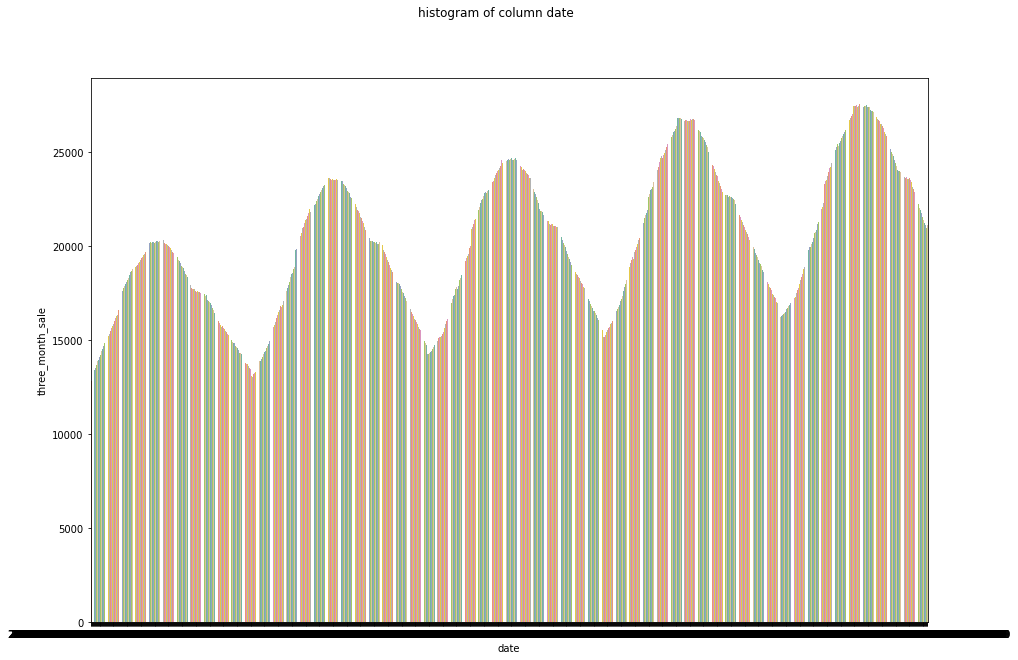

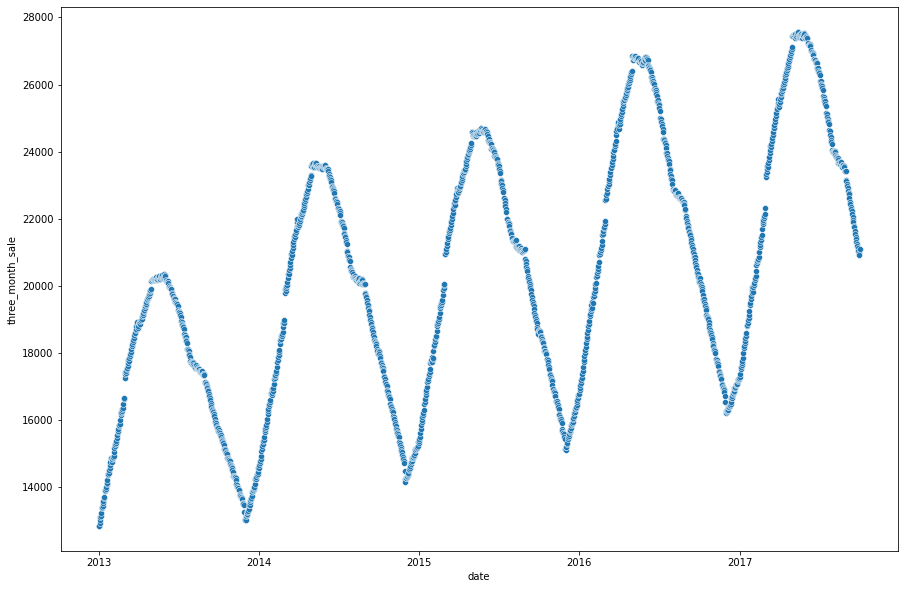

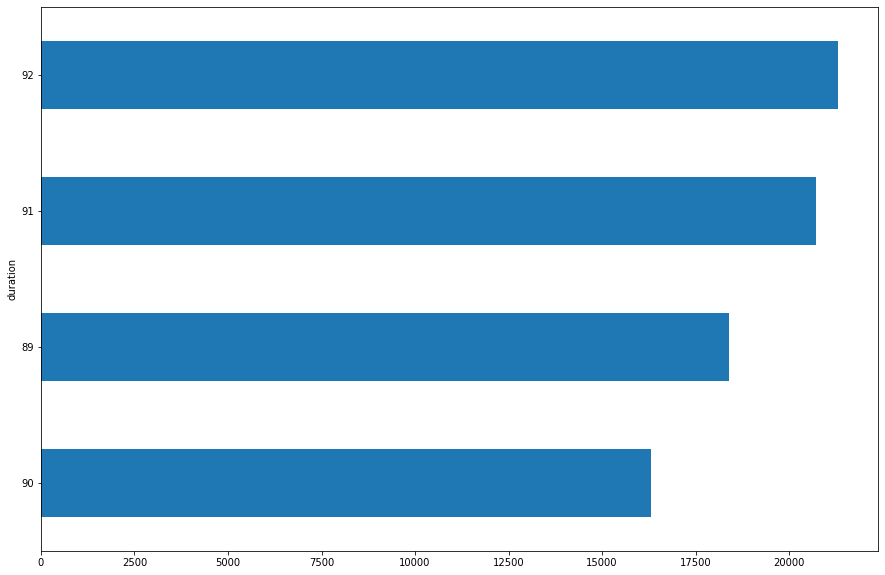

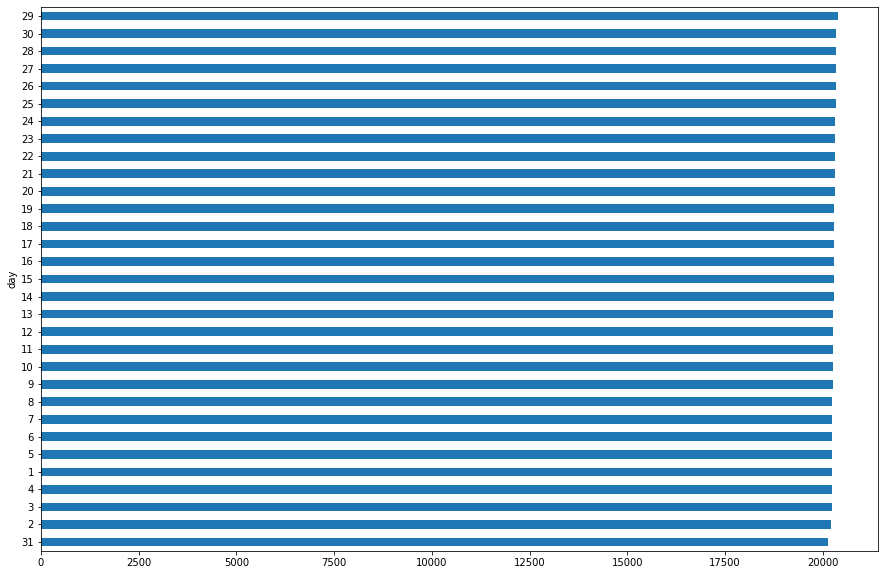

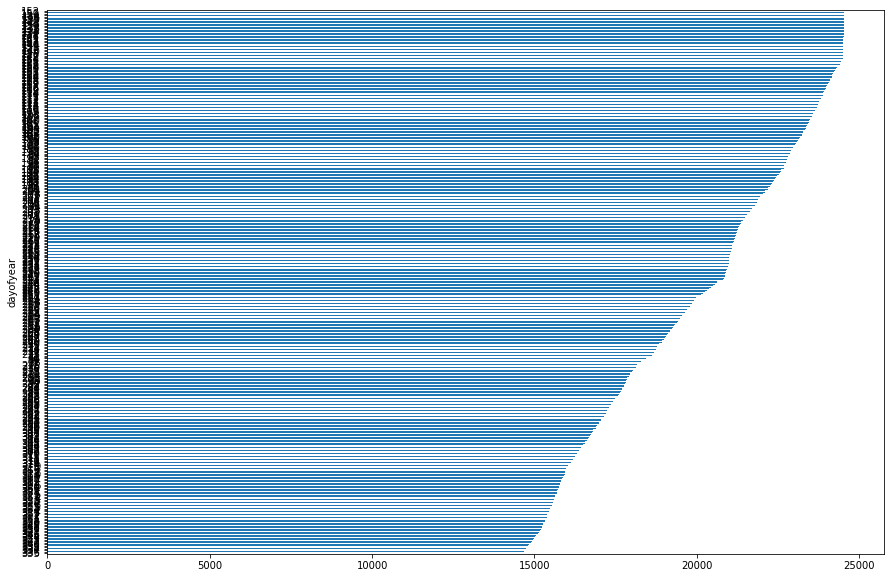

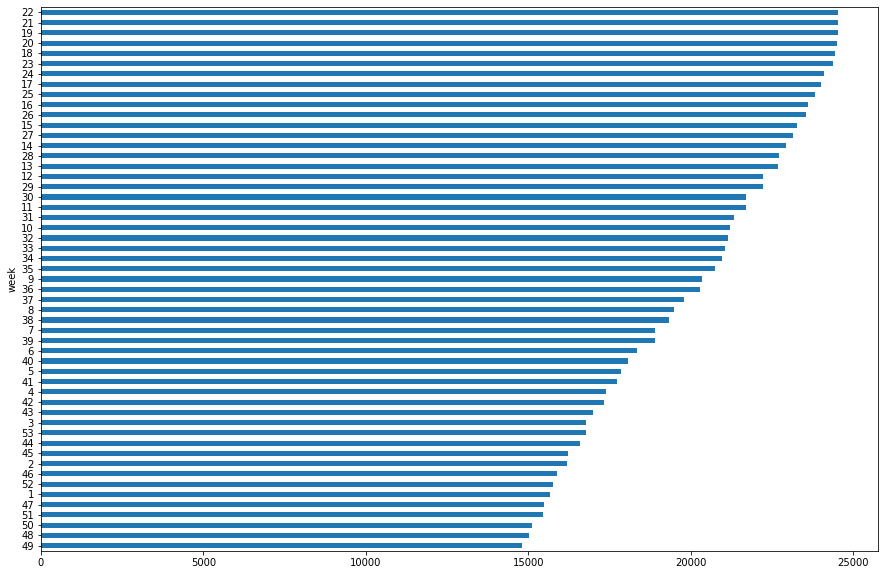

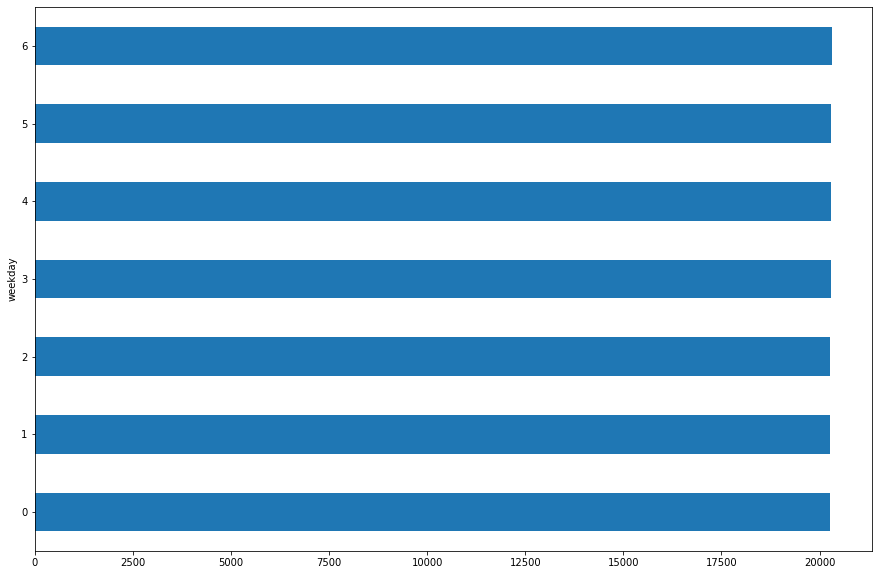

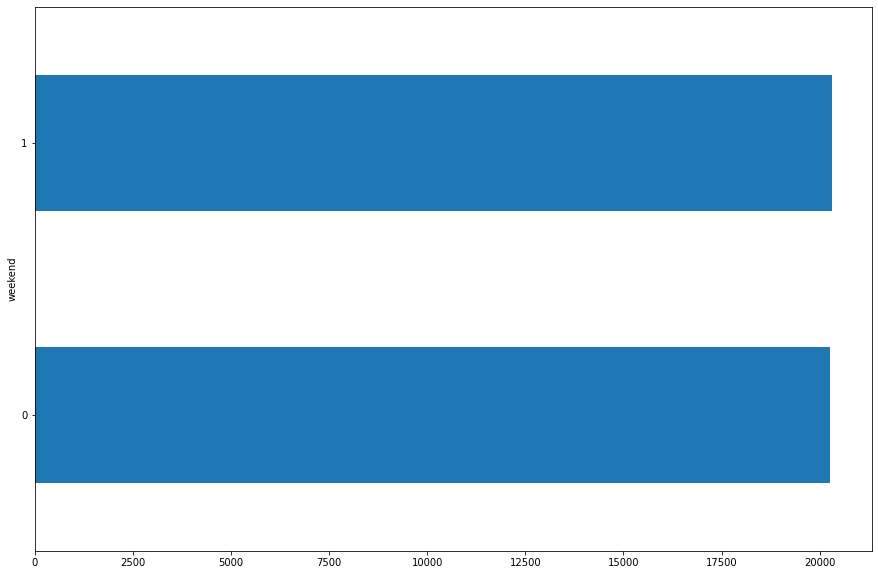

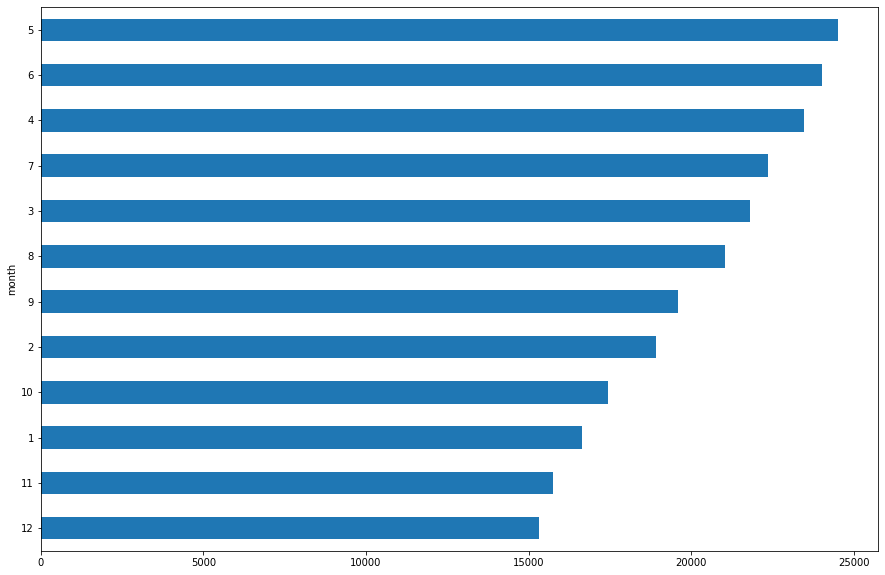

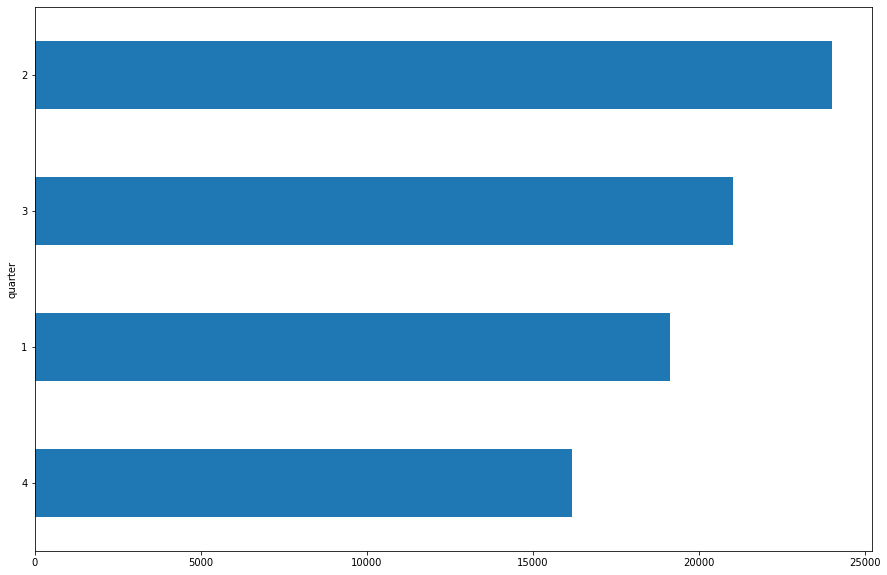

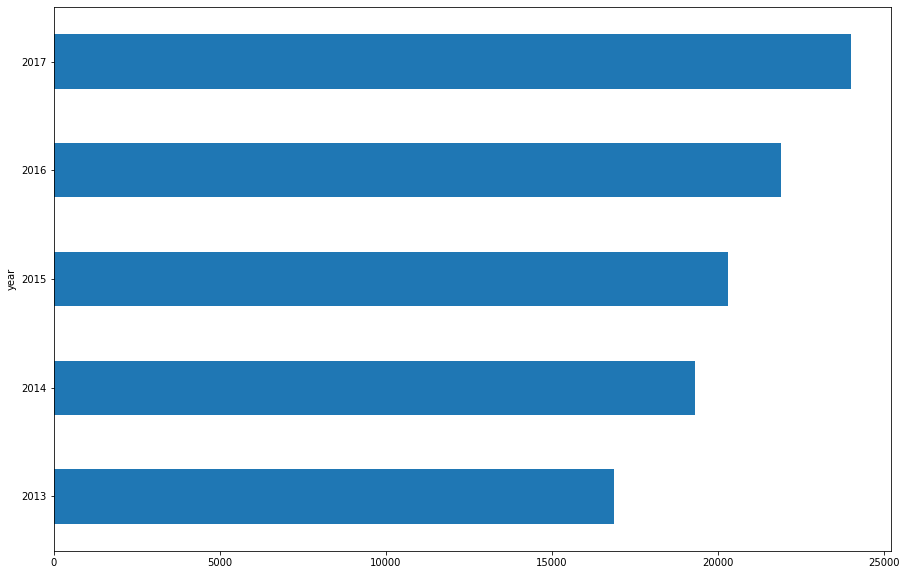

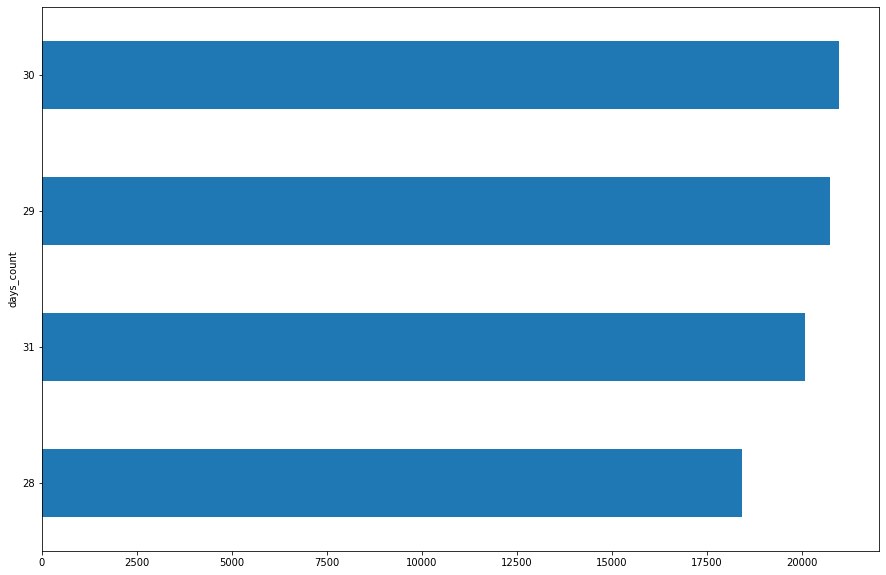

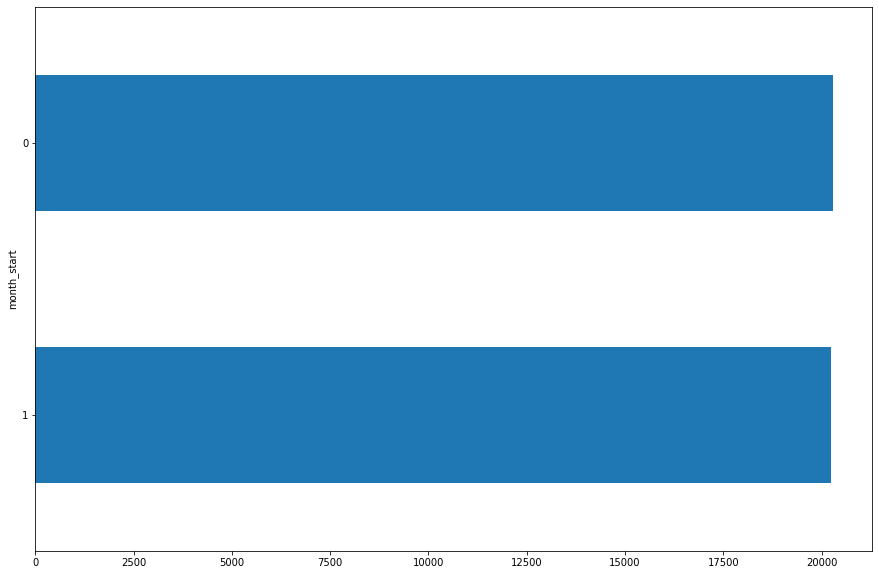

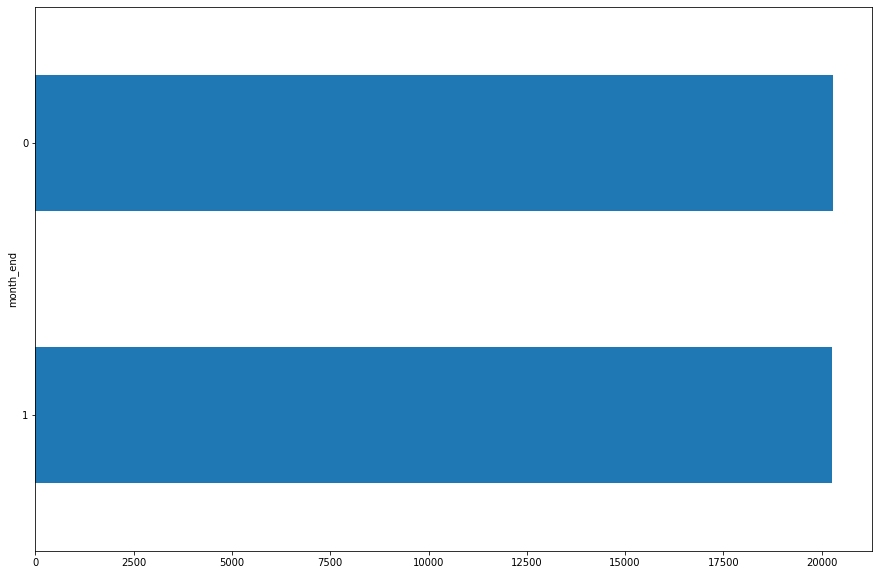

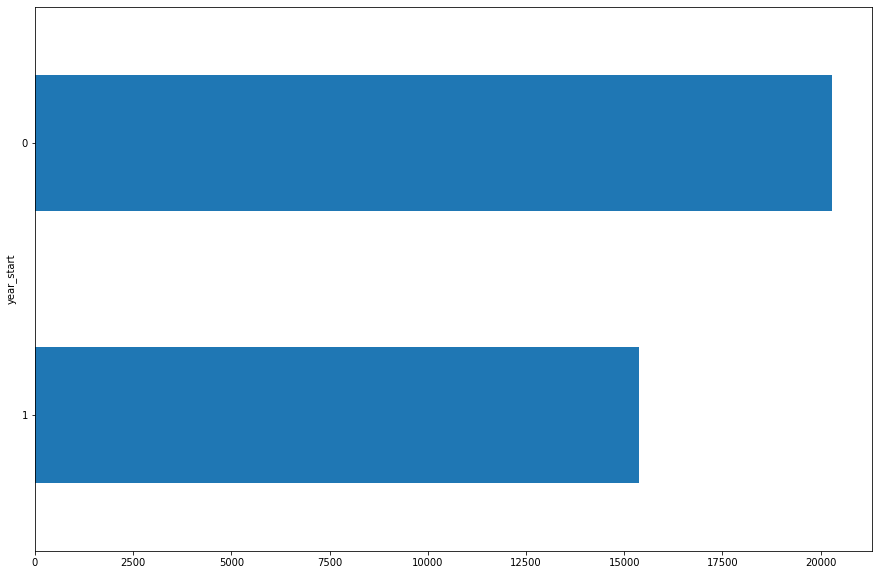

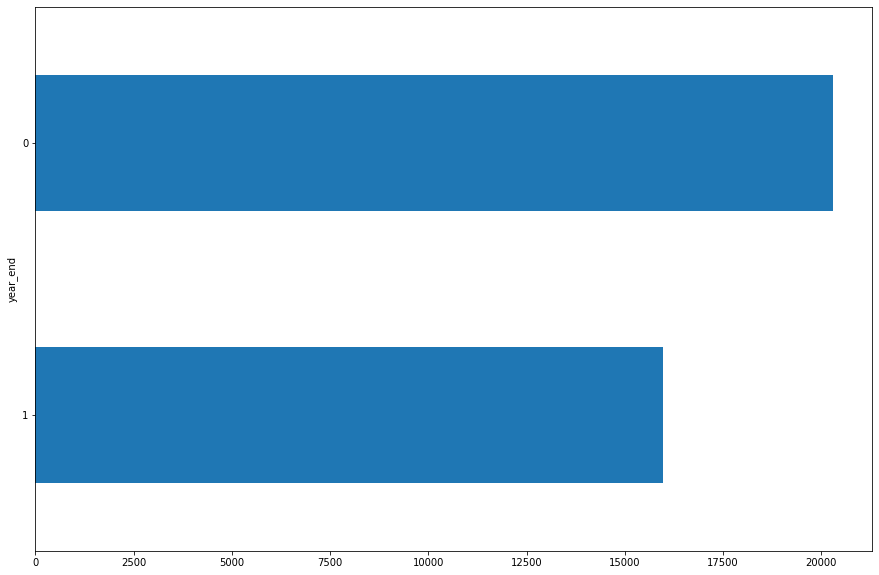

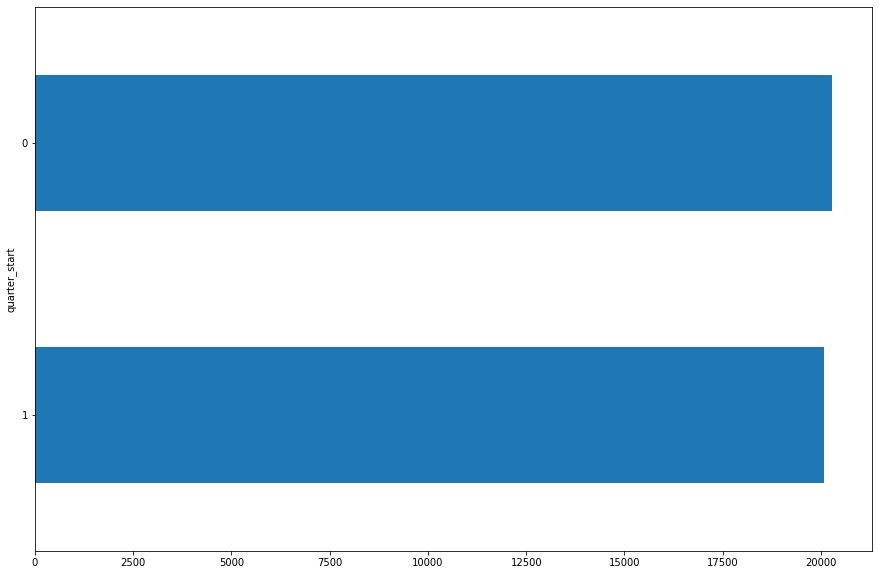

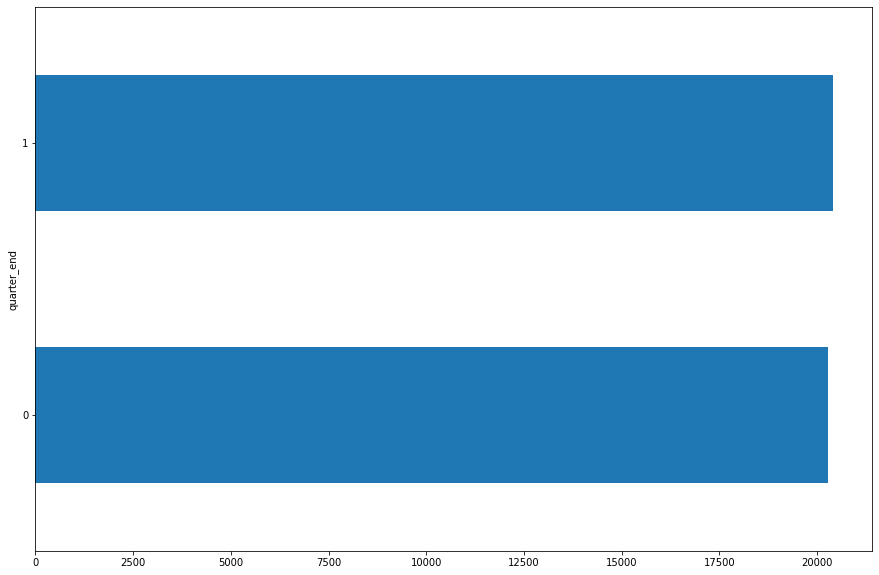

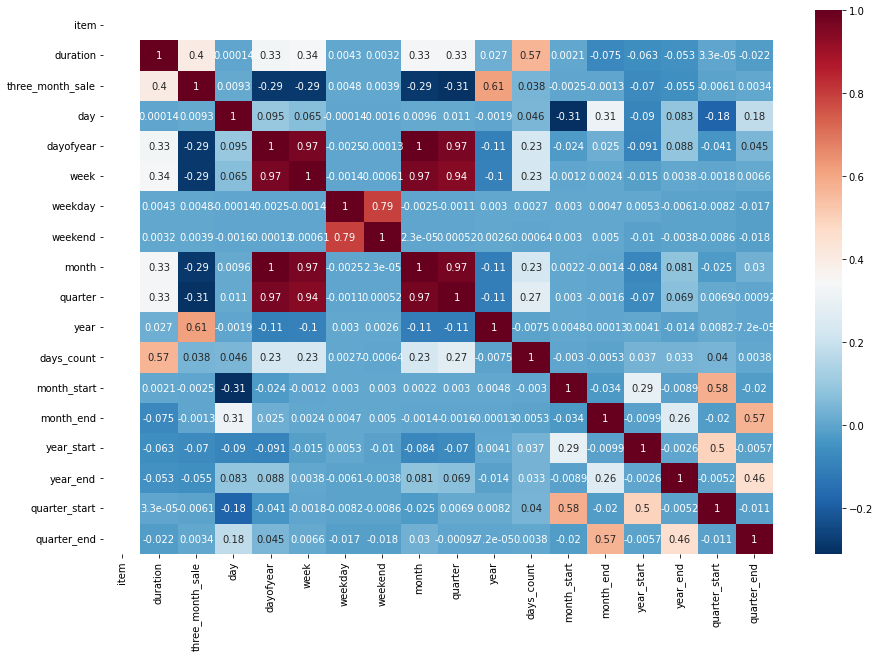

In [53]:
num_features=['date']
cat_features= ['duration', 'day', 'dayofyear',
       'week', 'weekday', 'weekend', 'month', 'quarter', 'year', 'days_count',
       'month_start', 'month_end', 'year_start', 'year_end', 'quarter_start',
       'quarter_end']
EDA(df,cat_features,num_features,'three_month_sale',1)

# **3. Splitting the data**

In [54]:
df=df.sort_values(by=['date','item'])

In [55]:
df

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year,days_count,month_start,month_end,year_start,year_end,quarter_start,quarter_end
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
1735,2013-01-01,2,90,34650,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
3470,2013-01-01,3,90,21420,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
5205,2013-01-01,4,90,12884,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
6940,2013-01-01,5,90,10630,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79809,2017-10-01,46,92,56785,1,274,39,6,1,10,4,2017,31,1,0,0,0,1,0
81544,2017-10-01,47,92,21132,1,274,39,6,1,10,4,2017,31,1,0,0,0,1,0
83279,2017-10-01,48,92,49695,1,274,39,6,1,10,4,2017,31,1,0,0,0,1,0
85014,2017-10-01,49,92,27934,1,274,39,6,1,10,4,2017,31,1,0,0,0,1,0


In [56]:
df.columns

Index(['date', 'item', 'duration', 'three_month_sale', 'day', 'dayofyear',
       'week', 'weekday', 'weekend', 'month', 'quarter', 'year', 'days_count',
       'month_start', 'month_end', 'year_start', 'year_end', 'quarter_start',
       'quarter_end'],
      dtype='object')

In [237]:
features=['date', 'item', 'duration', 'day', 'dayofyear','week', 'weekday', 
          'weekend', 'month', 'quarter', 'year', 'days_count','month_start', 
          'month_end', 'year_start', 'year_end', 'quarter_start','quarter_end']

In [238]:
def splitting(df,item,feature,target,date):
  split_date=pd.to_datetime('24-07-2016')
  X_train=df[(df['item']==item ) & (df[date]<split_date)].drop([target,date,'item'],axis=1).values
  X_test=df[(df['item']==item ) & (df[date]>=split_date)].drop([target,date,'item'],axis=1).values
  y_train=df[(df['item']==item ) & (df[date]<split_date)].drop(feature,axis=1).values
  y_test=df[(df['item']==item ) & (df[date]>=split_date)].drop(feature,axis=1).values
  y_train=y_train.flatten()
  y_test=y_test.flatten()
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  scaler=scaler.fit(X_train)
  X_train_scale=scaler.transform(X_train)
  X_test_scale=scaler.transform(X_test)
  return X_train_scale,X_test_scale,y_train,y_test

In [239]:
X_train_scale,X_test_scale,y_train,y_test=splitting(df,1,features,'three_month_sale','date')

# **4. Scaling the data**

In [90]:
def scaling(train,test):                               # scaling the data for important for KNN,voting regressor 
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler()
  #for ix,i in enumerate(features):
  scaler=scaler.fit(train)
  X_train_scale=scaler.transform(train)
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

In [242]:
len(X_test_scale[0])

16

In [243]:
y_train

array([12847, 12848, 12936, ..., 23811, 23762, 23733])

In [244]:
X_train_scale

array([[-1.37443805, -1.66986145, -1.6334152 , ..., -0.04809397,
         9.25562892, -0.10433825],
       [-1.37443805, -1.55586576, -1.62377197, ..., -0.04809397,
        -0.10804236, -0.10433825],
       [-1.37443805, -1.44187007, -1.61412874, ..., -0.04809397,
        -0.10804236, -0.10433825],
       ...,
       [ 0.74008203,  0.61005231,  0.31451773, ..., -0.04809397,
        -0.10804236, -0.10433825],
       [ 0.74008203,  0.72404799,  0.32416096, ..., -0.04809397,
        -0.10804236, -0.10433825],
       [ 0.74008203,  0.83804368,  0.3338042 , ..., -0.04809397,
        -0.10804236, -0.10433825]])

In [60]:
#X_train_scale,X_test_scale=scaling(X_train,X_test)
#print(X_train_scale.shape,X_test_scale.shape)

# **5. Build the model**

In [245]:
from sklearn.linear_model import LinearRegression   # for linear regression
from sklearn.neighbors import KNeighborsRegressor   # for KNN regression
from sklearn.tree import DecisionTreeRegressor      # for Decision tree regression
from sklearn.ensemble import RandomForestRegressor  # for Random Forest regression
import xgboost 
from xgboost import XGBRegressor                    # for XGBoost regression
from sklearn.ensemble import VotingRegressor        # for voting regressoin

In [246]:
def algorithm (model,X_train, X_test, y_train, y_test,k):    # definition of model building for all models
  from sklearn.model_selection import cross_val_score
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  mod=model
  mod.fit(X_train, y_train)                                  # fit the training set into the model
  y_predict_mod=mod.predict(X_test)                          # predict the result testing set
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod}) # dataframe of actual and predicted
  score=mod.score(X_test,y_test)                             # score of prediction
  MAE=mean_absolute_error(y_test,y_predict_mod)              # squared error of prediction
  print('for ' ,k ,' value ',"Train Accuracy : ",round(mod.score(X_train,y_train),3),"Val Accuracy :" ,round(np.mean(cross_val_score_time(mod, X_train, y_train)),3))
  return y_predict_mod,result,score,mod,MAE

In [249]:
def cross_val_score_time(mod,X_train,y_train):
  from sklearn.model_selection import TimeSeriesSplit
  from sklearn.metrics import r2_score
  tscv = TimeSeriesSplit(n_splits=3,test_size=200,max_train_size=700)
  scores=[]
  for i in tscv.split(X_train):
    X_tr,X_te=pd.DataFrame(list(map(X_train.__getitem__,i[0]))),pd.DataFrame(list(map(X_train.__getitem__,i[1])))
    y_tr,y_te=pd.Series(list(map(y_train.__getitem__,i[0]))),pd.Series(list(map(y_train.__getitem__,i[1])))
    X_tr=X_tr.values
    X_te=X_te.values
    y_tr=y_tr.values
    y_te=y_te.values
    #print(X_tr.shape)
    #print(X_te.shape)
    mod.fit(X_tr,y_tr)
    pred=mod.predict(X_te)
    sco=r2_score(y_te,pred)
    scores.append(sco)
  return scores

In [250]:
cross_val_score_time(Xgb,X_train_scale,y_train)

[0.9333166443551927, 0.9259459825914487, 0.653466493222024]

# **i) Linear Regression algorithm**

In [251]:
y_predict_lr,result_L,score_L,lin,MAE_L=algorithm(LinearRegression(),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_L.head())
print('MAE error of linear regeression is ' ,MAE_L)
print(' Score of LinearRegression algorithmn is ', score_L * 100)

for  1  value  Train Accuracy :  0.79 Val Accuracy : -0.086
   actual       predict
0   23645  22314.130508
1   23489  22242.086830
2   23446  22266.003594
3   23348  22289.920358
4   23291  22313.837122
MAE error of linear regeression is  2089.0895936450174
 Score of LinearRegression algorithmn is  47.91829909878273


# **ii) KNN regression model**

In [252]:
for i in range (1,10):
  algorithm(KNeighborsRegressor(i),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  1.0 Val Accuracy : 0.748
for  2  value  Train Accuracy :  0.993 Val Accuracy : 0.721
for  3  value  Train Accuracy :  0.984 Val Accuracy : 0.725
for  4  value  Train Accuracy :  0.975 Val Accuracy : 0.722
for  5  value  Train Accuracy :  0.969 Val Accuracy : 0.71
for  6  value  Train Accuracy :  0.962 Val Accuracy : 0.715
for  7  value  Train Accuracy :  0.955 Val Accuracy : 0.723
for  8  value  Train Accuracy :  0.949 Val Accuracy : 0.721
for  9  value  Train Accuracy :  0.943 Val Accuracy : 0.722


In [253]:
y_predict_knn,result_K,score_K,knn,MAE_K=algorithm(KNeighborsRegressor(1),X_train_scale, X_test_scale, y_train, y_test,1)
print(result_K.tail())
print('MAE error of knn regeression is ' , MAE_K)
print(' Score of KNN Regression algorithmn is ', score_K * 100)

for  1  value  Train Accuracy :  1.0 Val Accuracy : 0.748
     actual  predict
430   21126  19076.0
431   21031  19012.0
432   20974  18951.0
433   20911  18570.0
434   21105  25401.0
MAE error of knn regeression is  1031.2781609195401
 Score of KNN Regression algorithmn is  86.75774722676734


# **iii)Decision Tree Regression model**

In [254]:
for i in range(1,25,2):
  algorithm(DecisionTreeRegressor(max_depth=i,random_state=97),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.34 Val Accuracy : -0.086
for  3  value  Train Accuracy :  0.814 Val Accuracy : 0.515
for  5  value  Train Accuracy :  0.955 Val Accuracy : 0.716
for  7  value  Train Accuracy :  0.99 Val Accuracy : 0.768
for  9  value  Train Accuracy :  0.999 Val Accuracy : 0.779
for  11  value  Train Accuracy :  1.0 Val Accuracy : 0.778
for  13  value  Train Accuracy :  1.0 Val Accuracy : 0.779
for  15  value  Train Accuracy :  1.0 Val Accuracy : 0.78
for  17  value  Train Accuracy :  1.0 Val Accuracy : 0.779
for  19  value  Train Accuracy :  1.0 Val Accuracy : 0.776
for  21  value  Train Accuracy :  1.0 Val Accuracy : 0.781
for  23  value  Train Accuracy :  1.0 Val Accuracy : 0.781


In [255]:
y_predict_dt,result_D,score_D,dt,MAE_D=algorithm(DecisionTreeRegressor(max_depth=21,random_state=97),X_train_scale, X_test_scale, y_train, y_test,21)
print(result_D.head())
print('MAE error of Decision Tree regeression is ' , MAE_D)
print(' Score of Decision Tree Regression algorithmn is ', score_D * 100)

for  21  value  Train Accuracy :  1.0 Val Accuracy : 0.781
   actual  predict
0   23645  23733.0
1   23489  23960.0
2   23446  23960.0
3   23348  23872.0
4   23291  23811.0
MAE error of Decision Tree regeression is  1092.2068965517242
 Score of Decision Tree Regression algorithmn is  86.45078115464115


# **iv) Random Forest Regression model**

In [256]:
for i in [10,20,30,40,50,60,70,80,90,100]:
  algorithm(RandomForestRegressor(n_estimators=i,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  10  value  Train Accuracy :  0.997 Val Accuracy : 0.685
for  20  value  Train Accuracy :  0.998 Val Accuracy : 0.681
for  30  value  Train Accuracy :  0.998 Val Accuracy : 0.71
for  40  value  Train Accuracy :  0.999 Val Accuracy : 0.708
for  50  value  Train Accuracy :  0.999 Val Accuracy : 0.711
for  60  value  Train Accuracy :  0.999 Val Accuracy : 0.727
for  70  value  Train Accuracy :  0.999 Val Accuracy : 0.718
for  80  value  Train Accuracy :  0.999 Val Accuracy : 0.701
for  90  value  Train Accuracy :  0.999 Val Accuracy : 0.709
for  100  value  Train Accuracy :  0.999 Val Accuracy : 0.707


In [257]:
y_predict_rfr,result_R,score_R,rfr,MAE_R=algorithm(RandomForestRegressor(n_estimators=60,random_state=97,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,60)
print(result_R)
print('MAE error of Random forest regeression is ' , MAE_R)
print(' Score of random forest regresssion is ', score_R * 100)

for  60  value  Train Accuracy :  0.999 Val Accuracy : 0.727
     actual       predict
0     23645  22837.933333
1     23489  21991.366667
2     23446  21941.716667
3     23348  22064.416667
4     23291  22016.016667
..      ...           ...
430   21126  19146.716667
431   21031  19107.433333
432   20974  19023.433333
433   20911  18707.783333
434   21105  19030.716667

[435 rows x 2 columns]
MAE error of Random forest regeression is  1229.0480076628353
 Score of random forest regresssion is  84.84275634844718


# **v)Xgboost Regression model**

In [258]:
for i in np.arange(0.1,1.1,0.1):
  algorithm(XGBRegressor(learning_rate=i,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  1.0 Val Accuracy : 0.835
for  0.2  value  Train Accuracy :  1.0 Val Accuracy : 0.818
for  0.30000000000000004  value  Train Accuracy :  1.0 Val Accuracy : 0.813
for  0.4  value  Train Accuracy :  1.0 Val Accuracy : 0.82
for  0.5  value  Train Accuracy :  1.0 Val Accuracy : 0.833
for  0.6  value  Train Accuracy :  1.0 Val Accuracy : 0.804
for  0.7000000000000001  value  Train Accuracy :  1.0 Val Accuracy : 0.797
for  0.8  value  Train Accuracy :  1.0 Val Accuracy : 0.784
for  0.9  value  Train Accuracy :  1.0 Val Accuracy : 0.808
for  1.0  value  Train Accuracy :  1.0 Val Accuracy : 0.811


In [259]:
for i in np.arange(0.05,0.15,0.01):
  algorithm(XGBRegressor(learning_rate=i,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.05  value  Train Accuracy :  1.0 Val Accuracy : 0.826
for  0.060000000000000005  value  Train Accuracy :  1.0 Val Accuracy : 0.824
for  0.07  value  Train Accuracy :  1.0 Val Accuracy : 0.829
for  0.08000000000000002  value  Train Accuracy :  1.0 Val Accuracy : 0.826
for  0.09000000000000001  value  Train Accuracy :  1.0 Val Accuracy : 0.825
for  0.1  value  Train Accuracy :  1.0 Val Accuracy : 0.835
for  0.11000000000000001  value  Train Accuracy :  1.0 Val Accuracy : 0.838
for  0.12000000000000001  value  Train Accuracy :  1.0 Val Accuracy : 0.828
for  0.13  value  Train Accuracy :  1.0 Val Accuracy : 0.825
for  0.14  value  Train Accuracy :  1.0 Val Accuracy : 0.828


In [260]:
y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.11,n_estimators= 200,random_state=97,objective='reg:squarederror'),X_train_scale, X_test_scale, y_train, y_test,0.11)
print(result_X)
print('MAE error of XGBoost regeression is ' , MAE_X)
print(' Score of Xgboost regression is ', score_X * 100)

for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.838
     actual       predict
0     23645  23737.837891
1     23489  23250.396484
2     23446  23227.599609
3     23348  23178.250000
4     23291  23120.949219
..      ...           ...
430   21126  19609.148438
431   21031  19540.867188
432   20974  19493.701172
433   20911  19448.775391
434   21105  19418.437500

[435 rows x 2 columns]
MAE error of XGBoost regeression is  638.1918642241379
 Score of Xgboost regression is  95.55724350176153


# **vi)Voting Regressor algorithm**

In [261]:
y_predict_vot,result_V,score_V,vot,MAE_V=algorithm(VotingRegressor(estimators= [('KNN',knn),('DT',dt),('XGB',Xgb)]),X_train_scale, X_test_scale, y_train, y_test,'4 models')
print(result_V)
print('MAE error of voting regeression is ' , MAE_V)
print(' Score of Voting regression algorithmn is ', score_V * 100)

for  4 models  value  Train Accuracy :  1.0 Val Accuracy : 0.809
     actual       predict
0     23645  23734.612630
1     23489  23728.798828
2     23446  23715.866536
3     23348  23640.750000
4     23291  23580.983073
..      ...           ...
430   21126  19157.716146
431   21031  19061.289062
432   20974  19025.233724
433   20911  18862.925130
434   21105  21172.479167

[435 rows x 2 columns]
MAE error of voting regeression is  820.7876047653257
 Score of Voting regression algorithmn is  92.6590967388012


# **6.  Evaluation metrics**

In [262]:
from sklearn.metrics import r2_score          # R2 score  is suitable for regression problem for evaluavating the model

In [263]:
def evaluate(mod,X_test,y_test,predict,result):
  R2_score=r2_score(y_test,predict)
  plt.figure(figsize=(20,10))
  sns.jointplot(x=y_test,y=predict,data=result,kind='reg')   # plottig the graph between actual and predicted
  plt.show()
  print('R2 score of ',mod,' : ', R2_score) 

# **i) Evaluation metric for logistic regression algorithm**

<Figure size 1440x720 with 0 Axes>

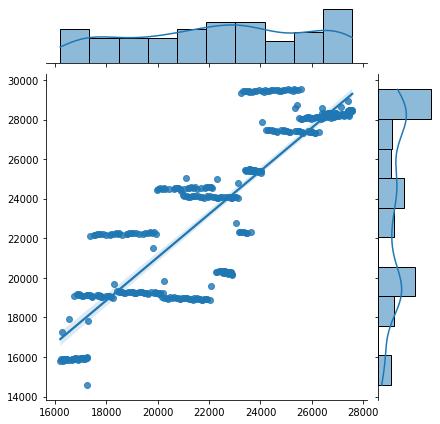

R2 score of  LinearRegression()  :  0.47918299098782735


In [264]:
evaluate(lin,X_test_scale,y_test,y_predict_lr,result_L)

# **ii) Evaluation metric for KNN classifier algorithm**

<Figure size 1440x720 with 0 Axes>

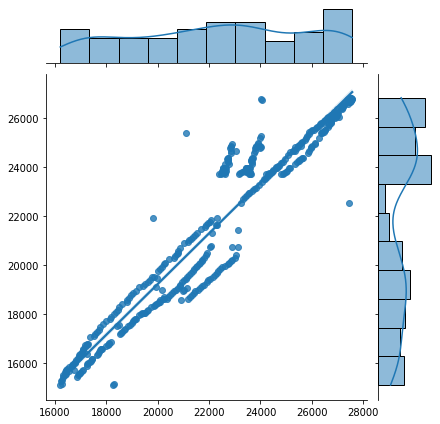

R2 score of  KNeighborsRegressor(n_neighbors=1)  :  0.8675774722676733


In [265]:
evaluate(knn,X_test_scale,y_test,y_predict_knn,result_K)

# **iii) Evaluation metric for Decision Tree classifier algorithm**

<Figure size 1440x720 with 0 Axes>

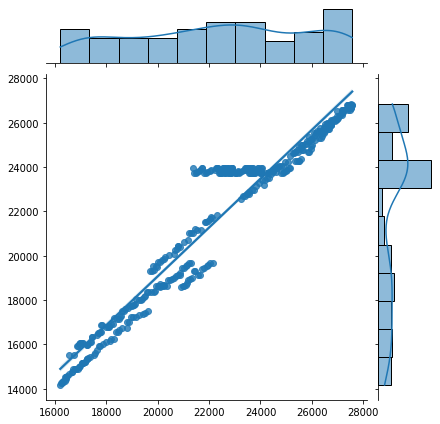

R2 score of  DecisionTreeRegressor(max_depth=21, random_state=97)  :  0.8645078115464114


In [266]:
evaluate(dt,X_test_scale,y_test,y_predict_dt,result_D)

In [231]:
from sklearn import tree

In [ ]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=400)
#tree.plot_tree(dt,filled = True);
#fig.savefig('imagename2.png')

# **iv)Evaluation metric for RandomForest classifier**

<Figure size 1440x720 with 0 Axes>

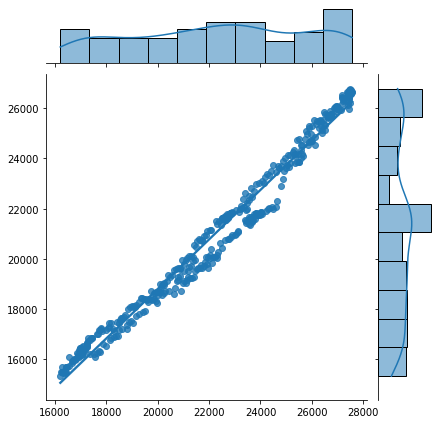

R2 score of  RandomForestRegressor(max_features='sqrt', n_estimators=60, random_state=97)  :  0.8484275634844718


In [267]:
evaluate(rfr,X_test_scale,y_test,y_predict_rfr,result_R)

# **v)Evaluation metric for Xgboost classifier**

<Figure size 1440x720 with 0 Axes>

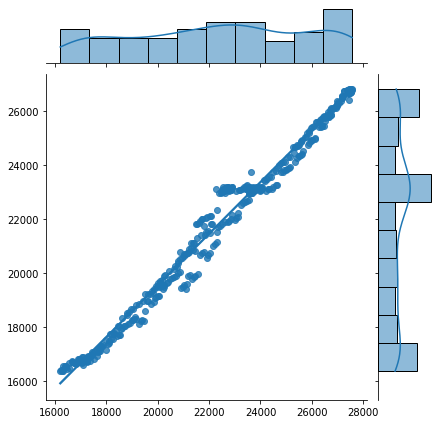

R2 score of  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=97, ...)  :  0.9555724350176154


In [268]:
evaluate(Xgb,X_test_scale,y_test,y_predict_Xgb,result_X)

# **vi) evaluation metric for Voting classifier**

<Figure size 1440x720 with 0 Axes>

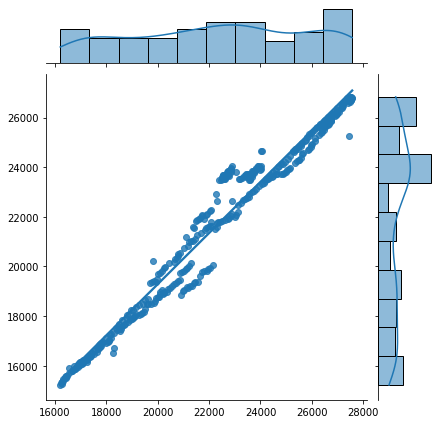

R2 score of  VotingRegressor(estimators=[('KNN', KNeighborsRegressor(n_neighbors=1)),
                            ('DT',
                             DecisionTreeRegressor(max_depth=21,
                                                   random_state=97)),
                            ('XGB',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          g...one,
                                          grow_policy=None,
                                          importance

In [269]:
evaluate(vot,X_test_scale,y_test,y_predict_vot,result_V)


# **SCORING COMPARISON**

In [270]:
score=[score_L,score_K,score_D,score_R,score_X,score_V]
model=['Linear regression','KNN regression','Decision tree regression','RandomForest regression','XGboost regression','voting regression']
RESULT= pd.DataFrame({'model': model, 'score': score})
RESULT

,model,score
0,Linear regression,0.479183
1,KNN regression,0.867577
2,Decision tree regression,0.864508
3,RandomForest regression,0.848428
4,XGboost regression,0.955572
5,voting regression,0.926591


# **Model Deploying**

In [272]:
def splitting(df,item,feature,target,date):
  split_date=pd.to_datetime('24-07-2016')
  X_train=df[(df['item']==item ) & (df[date]<split_date)].drop([target,date,'item'],axis=1).values
  X_test=df[(df['item']==item ) & (df[date]>=split_date)].drop([target,date,'item'],axis=1).values
  y_train=df[(df['item']==item ) & (df[date]<split_date)].drop(feature,axis=1).values
  y_test=df[(df['item']==item ) & (df[date]>=split_date)].drop(feature,axis=1).values
  y_train=y_train.flatten()
  y_test=y_test.flatten()
  return X_train,X_test,y_train,y_test

In [278]:
model_list=[0]
score_list=[0]
for i in range(1,51):
  X_train,X_test,y_train,y_test=splitting(df,i,features,'three_month_sale','date')
  y_predict_Xgb,result_X,score_X,Xgb,MAE_X=algorithm(XGBRegressor(learning_rate=0.11,n_estimators= 500,random_state=97,objective='reg:squarederror'),X_train, X_test, y_train, y_test,0.11)
  model_list.append(Xgb)
  score_list.append(score_X)


for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.838
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.839
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.839
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.831
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.791
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.826
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.819
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.819
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.845
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.821
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.812
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.837
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.82
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.796
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.819
for  0.11  value  Train Accuracy :  1.0 Val Accuracy : 0.851
for  0.11  value  Train A

In [279]:
import pickle

In [284]:
for i in range(1,51):
  pickle.dump(model_list[i],open(f'best_Xgb {i}_model.pkl','wb'))

In [283]:
X_test[0]

array([  92,   24,  206,   29,    6,    1,    7,    3, 2016,   31,    0,
          0,    0,    0,    0,    0])

In [286]:
model=pickle.load(open('best_Xgb 3_model.pkl','rb'))
model.predict([[92,24,206,29,6,1,7,3,2016,31,0,0,0,0,0,0]])

array([36761.45], dtype=float32)

In [288]:
score_list

[0,
 0.955749043381953,
 0.9368752554164405,
 0.9335125741552809,
 0.9506330745804836,
 0.9439416211085339,
 0.9195828164816976,
 0.9294844711848751,
 0.9337213081592259,
 0.9513889834485275,
 0.9279703673744927,
 0.9430750331912525,
 0.9324049900519579,
 0.9430165728294162,
 0.9297302640190884,
 0.9383232303610535,
 0.8913878563450295,
 0.9481302195226419,
 0.9249343888322683,
 0.88920861309978,
 0.9383152333961026,
 0.9526020457650584,
 0.9392034062743122,
 0.9297845735689028,
 0.9445684948184051,
 0.9569293619212595,
 0.952467326961031,
 0.9443790621992215,
 0.9462841818292561,
 0.9233767237409946,
 0.9344956089242489,
 0.9255990148712345,
 0.9173748636611548,
 0.8974330781217371,
 0.9326312301838655,
 0.9338869415801405,
 0.9595150579841607,
 0.9479901956154876,
 0.9280758848373667,
 0.9245091280834795,
 0.9293721665149337,
 0.9231241675406576,
 0.9293322240946836,
 0.9285924169689697,
 0.94493827704072,
 0.9392028742872047,
 0.9414502150990648,
 0.9348340603616019,
 0.897035935183

In [287]:
!pip install streamlit
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 35.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=1956e7f1771f36a951546fb7ebe564f8632b926c02bad8

In [ ]:
df.head(2)

,date,item,duration,three_month_sale,day,dayofyear,week,weekday,weekend,month,quarter,year,days_count,month_start,month_end,year_start,year_end,quarter_start,quarter_end
0,2013-01-01,1,90,12847,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0
1735,2013-01-01,2,90,34650,1,1,1,1,0,1,1,2013,31,1,0,1,0,1,0


In [289]:
%%writefile app_idf.py

import numpy as np
import pickle
import pandas as pd
import streamlit as st
import datetime



def deploy():
  st.set_page_config(layout='wide')
  
  st.title('ITEM DEMAND FORECASTING')
  st.header('Enter the item Details')
  date=st.date_input('which date you want to Forecast :')
  item=st.number_input('which item you want to forecast:' , min_value=1,max_value=50)

  if st.button('Demand Forecast'):
    forecast=predict(date,item)
    forecast=np.round_(forecast,0)
    st.success(f'Demand of {item} Item at after 3 Months is : {forecast[0]}')
def isweekend(data):
  if data < 5 :
    return 0
  else:
    return 1
  
def predict(date,item):
  date=pd.to_datetime(date)
  duration=(pd.to_datetime(date+pd.DateOffset(months=+3))-pd.to_datetime(date)).days
  df=pd.DataFrame({'date':[date],'item':[item],'duration':[duration]})
  df['day']=df['date'].dt.day
  df['dayofyear']=df['date'].dt.dayofyear
  df['week']=df['date'].dt.weekofyear
  df['weekday']=df['date'].dt.weekday
  df['weekend']=[isweekend(i) for i in df['weekday']]
  df['month']=df['date'].dt.month
  df['quarter']=df['date'].dt.quarter
  df['year']=df['date'].dt.year
  df['days_count']=df['date'].dt.days_in_month.astype(int)
  df['month_start']=df['date'].dt.is_month_start.astype(int)
  df['month_end']=df['date'].dt.is_month_end.astype(int)
  df['year_start']=df['date'].dt.is_year_start.astype(int)
  df['year_end']=df['date'].dt.is_year_end.astype(int)
  df['quarter_start']=df['date'].dt.is_quarter_start.astype(int)
  df['quarter_end']=df['date'].dt.is_quarter_end.astype(int)
  X_test=df.drop('date','item',axis=1).values
  model=pickle.load(open(f'best_Xgb {item}_model.pkl','rb'))
  prediction=model.predict(X_test)
    
  return prediction
  

if __name__=='__main__':
  deploy()

Writing app_idf.py


In [293]:
!streamlit run app_idf.py & npx localtunnel --port 8501

npx: installed 22 in 2.646s



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.196.228:8501

your url is: https://every-taxes-greet-35-229-196-228.loca.lt
  Stopping...
^C
